In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#prices = pd.read_csv('prices.csv')
PSA = pd.read_csv('prices-split-adjusted.csv')
securities = pd.read_csv('securities.csv')
fundamentals = pd.read_csv('fundamentals.csv')
display(PSA.head(), securities.head(), fundamentals.head())

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [2]:
Security_Names = PSA.symbol.unique()
max_dates = max([len(PSA.loc[PSA['symbol'] == Security_Names[i]]) for i in range(len(Security_Names))])

In [3]:
max_dates

1762

In [239]:
New_Name_list = []
Price_array = []
for name in Security_Names:
    temp = PSA.loc[PSA['symbol'] == name]['close'].reset_index(drop = True)
    if len(temp) == max_dates and len(fundamentals.loc[fundamentals['Ticker Symbol'] == name]) == 4:
        New_Name_list.append(name)
        temp = temp / temp.iloc[0] * 100 # standardize the price data
        Price_array.append(temp)

price_df = pd.DataFrame(Price_array).T
price_df.columns = New_Name_list
return_df = np.log(price_df / price_df.shift(1))
cov_df = return_df.cov()*252
cor_df = return_df.corr()

In [241]:
import seaborn as sns

<AxesSubplot:>

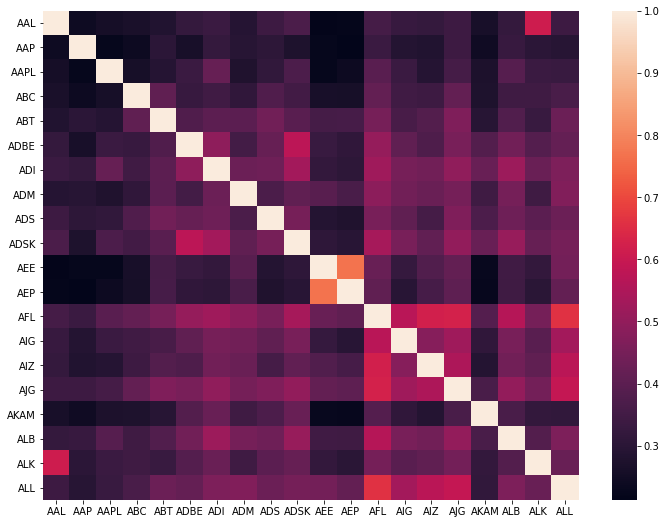

In [252]:
plt.figure(figsize = (12,9))
sns.heatmap(cor_df.iloc[:20, :20])

In [5]:
cov_df # Covariance Matrix

,AAL,AAP,AAPL,ABC,ABT,ADBE,ADI,ADM,ADS,ADSK,...,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZBH,ZION,AIV
AAL,0.234685,0.031898,0.032590,0.027268,0.025376,0.044199,0.041153,0.035407,0.045668,0.061442,...,0.043491,0.035168,0.020923,0.037505,0.044612,0.040776,0.034046,0.031844,0.061448,0.041333
AAP,0.031898,0.074231,0.015962,0.013651,0.015422,0.020462,0.022363,0.019996,0.023134,0.025967,...,0.020173,0.021285,0.013536,0.019266,0.023021,0.020874,0.022386,0.017881,0.028926,0.020034
AAPL,0.032590,0.015962,0.068885,0.014469,0.014268,0.024823,0.027947,0.018259,0.022863,0.033652,...,0.021890,0.021938,0.017289,0.020473,0.027310,0.024407,0.022009,0.020469,0.031296,0.021301
ABC,0.027268,0.013651,0.014469,0.044433,0.015985,0.019564,0.018544,0.016557,0.022038,0.025270,...,0.020516,0.016512,0.014443,0.019556,0.021645,0.020649,0.015817,0.017304,0.025125,0.018056
ABT,0.025376,0.015422,0.014268,0.015985,0.034512,0.019839,0.018936,0.018523,0.022755,0.025223,...,0.018738,0.017232,0.015809,0.019267,0.023649,0.018470,0.016297,0.020859,0.024365,0.016851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YHOO,0.040776,0.020874,0.024407,0.020649,0.018470,0.032994,0.031216,0.027043,0.031815,0.043029,...,0.027920,0.027719,0.020548,0.026070,0.032839,0.092418,0.025526,0.025425,0.034505,0.025492
YUM,0.034046,0.022386,0.022009,0.015817,0.016297,0.028232,0.025453,0.022379,0.024353,0.034184,...,0.024136,0.022029,0.018940,0.022250,0.026846,0.025526,0.061169,0.019797,0.034173,0.024816
ZBH,0.031844,0.017881,0.020469,0.017304,0.020859,0.025775,0.024804,0.022752,0.025322,0.032961,...,0.024656,0.020245,0.020575,0.027993,0.031010,0.025425,0.019797,0.051172,0.033158,0.023953
ZION,0.061448,0.028926,0.031296,0.025125,0.024365,0.041474,0.041344,0.038993,0.043446,0.056580,...,0.046809,0.037457,0.032948,0.037906,0.052562,0.034505,0.034173,0.033158,0.116408,0.039871


In [6]:
mean_ret = return_df.mean()*252 # mean annual return

In [260]:
port_returns = []
port_variance = []
for i in range(100000):
    weights = np.random.random(len(New_Name_list[:10]))
    weights /= np.sum(weights)
    port_returns.append(np.sum(mean_ret.iloc[:10] * weights))
    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(cov_df.iloc[:10, :10], weights))))

In [263]:
cbd = []
for i in range(len(port_returns)):
    cbd.append((port_variance[i], port_returns[i], port_returns[i]/port_variance[i]))

In [264]:
cbd.sort(key = lambda x: x[2], reverse=True)

[(0.19211373082090066, 0.20006470991776687, 1.0413868340534105),
 (0.18026232473733397, 0.18743505343559497, 1.0397905036935067),
 (0.18765707327694853, 0.19495260106201864, 1.0388769133913924),
 (0.17974863437185595, 0.18669922076212472, 1.0386683682719375),
 (0.1878358377754485, 0.19432176012579955, 1.0345297384522796),
 (0.18697605966188305, 0.19341314420334885, 1.0344273194820035),
 (0.19423804069951361, 0.20083575054320016, 1.0339671354793638),
 (0.17702163810947824, 0.18287231722176334, 1.0330506438352287),
 (0.18207376914390533, 0.18796344179451832, 1.0323477273981074),
 (0.1722262025789948, 0.17774750093024375, 1.0320584107909858),
 (0.17232261102048824, 0.17777706130166673, 1.0316525512750616),
 (0.1777849279233852, 0.1831589443985169, 1.0302276269304875),
 (0.19294727984517807, 0.19860073119402538, 1.0293004978011802),
 (0.19262359385174974, 0.19814703042173176, 1.0286747664682918),
 (0.18322233308968758, 0.18847079123220864, 1.0286452969679845),
 (0.16861102694097968, 0.1734

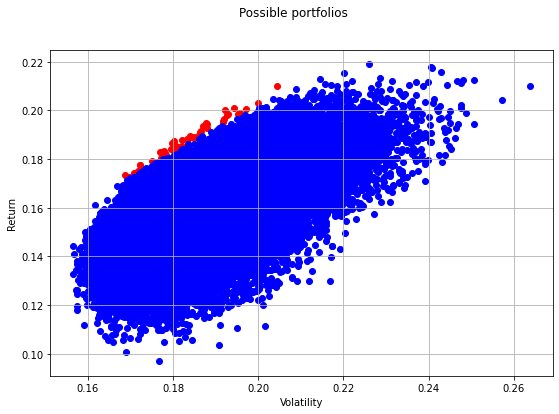

In [272]:
ll = 50
plt.figure(figsize = (9, 6))
plt.scatter([item[0] for item in cbd[:ll]], [item[1] for item in cbd[:ll]], color = 'r')
plt.scatter([item[0] for item in cbd[ll:]], [item[1] for item in cbd[ll:]], color = 'b')
plt.grid(True)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.suptitle('Possible portfolios')
plt.show()

In [9]:
import scipy.optimize as opt

def statistics(weights):
    weights = np.array(weights)
    port_ret = np.sum(mean_ret * weights)
    port_var = np.sqrt(np.dot(weights.T, np.dot(cov_df, weights)))
    return np.array([port_ret, port_var, port_ret / port_var])

def min_sharpe(weights):
    return - statistics(weights)[2]

length = len(New_Name_list)
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})
bnds = tuple((0,0.1) for x in range(length))
result = opt.minimize(min_sharpe, length*[1./length,], method = 'SLSQP', bounds = bnds, constraints = cons)

In [10]:
# optimal return, volatility, sharpe ratio
statistics(result['x']).round(3)

array([0.259, 0.146, 1.773])

In [11]:
kk = [0, 1]
kkk = np.array([9, 1, 2, 3, 3])
kkk[kk] = 0
kkk

array([0, 0, 2, 3, 3])

In [253]:
ret_list = []
var_list = []
sp_list = []
highwatermark = 0.0
t_ll = [0]
hwm = [0.0]

for i in range(200000):
    temp_idx = np.random.choice(length, 50, replace=False)
    temp_weight = np.zeros(length)
    temp_weight[temp_idx] = 0.02
    port_ret_0 = np.sum(mean_ret * temp_weight)
    port_var_0 = np.sqrt(np.dot(temp_weight.T, np.dot(cov_df, temp_weight)))
    #ret_list.append(port_ret_0)
    #var_list.append(port_var_0)
    #sp_list.append(port_ret_0 / port_var_0)
    if port_ret_0 / port_var_0 > highwatermark:
        highwatermark = port_ret_0 / port_var_0
        hwm.append(highwatermark)
        t_ll.append(t_ll[-1] + 1)

In [257]:
nn = []
for i in range(len(t_ll)):
    nn.append(1.05)

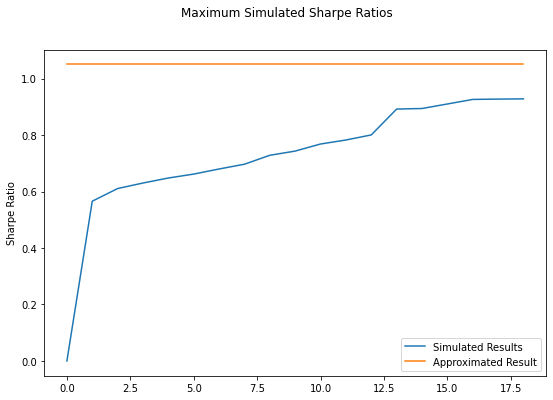

In [259]:
plt.figure(figsize = (9, 6))
plt.suptitle('Maximum Simulated Sharpe Ratios')
plt.plot(t_ll, hwm, label = 'Simulated Results')
plt.plot(t_ll, nn, label = 'Approximated Result')
plt.legend()
plt.ylabel('Sharpe Ratio')
plt.show()

In [13]:
highwatermark

0.9725119611263155

In [14]:
np.random.choice(5, 5, replace=False)

array([0, 3, 2, 4, 1])

In [15]:
weights_0 = result['x']
idx_list_0 = weights_0.argsort()[-50:][::-1]
chosen_0 = np.zeros(length).tolist()
for j in idx_list_0:
    chosen_0[j] = 1./idx_list_0
chosen_0 = np.array(chosen_0)
port_ret_0 = np.sum(mean_ret * chosen_0)
port_var_0 = np.sqrt(np.dot(chosen_0.T, np.dot(cov_df, chosen_0)))
print(port_ret_0, port_var_0, port_ret_0 / port_var_0)

0.14639718184629508 0.1444613514383187 1.013400334336502


In [16]:
result['x'].round(3) # optimal weights

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.027, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.039, 0.   , 0.   , 0.1  , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.023, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.02 , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [19]:
length = len(New_Name_list)
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})
bnds = tuple((0,0.1) for x in range(length))

In [20]:
# optimal weights to maximize sharpe ratio
chosen_list = []
for i in range(3, 7):
    temp_price_df = price_df.iloc[int(max_dates * i / 7): int(max_dates * (i+1) / 7)]
    temp_return_df = np.log(temp_price_df / temp_price_df.shift(1))
    temp_cov_df = temp_return_df.cov() * 252
    temp_mean_ret = temp_return_df.mean() * 252
    def temp_statistics(weights, ret = temp_mean_ret, cov = temp_cov_df):
        weights = np.array(weights)
        port_ret = np.sum(ret * weights)
        port_var = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
        return np.array([port_ret, port_var, port_ret / port_var])
    def temp_min_sharpe(weights):
        return - temp_statistics(weights)[2]
    temp_result = opt.minimize(temp_min_sharpe, length*[1./length,], method = 'SLSQP', bounds = bnds, constraints = cons)
    temp_weights = temp_result['x']
    temp_idx_list = temp_weight.argsort()[-50:][::-1]
    temp_chosen = np.zeros(length).tolist()
    for j in temp_idx_list:
        temp_chosen[j] = 1
    chosen_list.append(temp_chosen)

In [21]:
past_return = []
past_vol = []
for i in range(2, 6):
    temp_price_df = price_df.iloc[int(max_dates * i / 7): int(max_dates * (i+1) / 7)]
    temp_return_df = np.log(temp_price_df / temp_price_df.shift(1))
    temp_cov_df = temp_return_df.cov() * 252
    temp_mean_ret = temp_return_df.mean() * 252
    past_return.append(temp_mean_ret)
    past_vol.append([np.sqrt(temp_cov_df.iloc[i, i]) for i in range(len(temp_cov_df))])

In [22]:
corr_matrices = []
stock_to_market = []
port_values = np.ones(length) / length
for i in range(2, 7):
    temp_price_df = price_df.iloc[int(max_dates * i / 7): int(max_dates * (i+1) / 7)].reset_index(drop=True)
    temp_return_df = np.log(temp_price_df / temp_price_df.shift(1)).reset_index(drop=True)
    temp_cumu_val = (np.exp(temp_return_df.cumsum()) * (1./length)).sum(axis = 1).reset_index(drop=True)
    temp_cumu_val[0] = 1.
    temp_market_ret = np.log(temp_cumu_val / temp_cumu_val.shift(1))
    temp_return_df['Market'] = temp_market_ret
    temp_cum_ret = temp_return_df.sum(axis = 0)
    stock_to_market.append(temp_cum_ret / temp_cum_ret['Market'])
    corr_matrices.append(temp_return_df.corr().iloc[[-1]])    

In [23]:
train_data = []
test_data = []
for ind, name in enumerate(New_Name_list):
    temp_df = fundamentals.loc[fundamentals['Ticker Symbol'] == name].reset_index(drop=True)
    temp_df['Chosen'] = [chosen_list[i][ind] for i in range(4)]
    temp_df['Sector'] = [securities.loc[securities['Ticker symbol'] == name]['GICS Sector'].values[0] for i in range(4)]
    temp_df['Past Return'] = [past_return[i][ind] for i in range(4)]
    temp_df['Past Ret to Mkt'] = [stock_to_market[i][name] for i in range(4)]
    temp_df['Past Volatility'] = [past_vol[i][ind] for i in range(4)]
    temp_df['Past Corr w Mkt'] = [corr_matrices[i][name].values[0] for i in range(4)]
    temp_df['Profit Margin'] = temp_df['Net Income'] / temp_df['Total Revenue']
    temp_df['ROA'] = temp_df['Net Income'] / temp_df['Total Assets']
    temp_df['GM'] = temp_df['Gross Margin']
    temp_df['ATO'] = temp_df['Total Revenue'] / temp_df['Total Assets']
    temp_df['Leverage'] = temp_df['Total Liabilities'] / temp_df['Total Equity']
    temp_df['CR'] = temp_df['Total Current Assets'] / temp_df['Total Current Liabilities']
    temp_df['Positive Net Income'] = (temp_df['Net Income'] > 0) + 0
    temp_df['Positive OCF'] = (temp_df['Net Cash Flow-Operating'] > 0) + 0
    temp_df['Higher ROA'] = (temp_df['ROA'] > temp_df['ROA'].shift(1)) + 0
    temp_df['Earning Quality'] = (temp_df['Net Cash Flow-Operating'] > temp_df['Net Income']) + 0
    temp_df['Higher GM'] = (temp_df['GM'] > temp_df['GM'].shift(1)) + 0
    temp_df['Higher ATO'] = (temp_df['ATO'] > temp_df['ATO'].shift(1)) + 0
    temp_df['Lower Leverage'] = (temp_df['Leverage'] < temp_df['Leverage'].shift(1)) + 0
    temp_df['Higher CR'] = (temp_df['CR'] > temp_df['CR'].shift(1)) + 0
    temp_df['Lower SO'] = (temp_df['Estimated Shares Outstanding'] <= temp_df['Estimated Shares Outstanding'].shift(1)) + 0
    train_data.append(temp_df.loc[:2])
    test_data.append(temp_df.loc[3:])

train_data = pd.concat(train_data)
test_data = pd.concat(test_data)

In [25]:
temp_combined = pd.concat([train_data,test_data]).reset_index(drop=True)
temp_combined = pd.get_dummies(temp_combined, columns=["Sector"])
temp_combined = temp_combined[temp_combined.columns[79:]]
train_data = temp_combined.loc[:1244]
test_data = temp_combined.loc[1245:]

In [26]:
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

In [84]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000).fit(train_data[train_data.columns[1:]], train_data['Chosen'])
kk = clf.predict_log_proba(test_data[test_data.columns[1:]])
kk2 = clf.predict(test_data[test_data.columns[1:]])

In [121]:
N = 50
cc = kk.tolist()
for i in range(len(cc)):
    cc[i].append(i)
cc.sort(key = lambda x: x[1], reverse=True)
learned_weight = np.zeros(length).tolist()
for i in range(N):
    learned_weight[cc[i][2]] = 1/N
benchmark_weight = []
for i in range(length):
    benchmark_weight.append(1./length)

In [122]:
bt_price_df = price_df.iloc[int(max_dates * 6 / 7): int(max_dates * 7 / 7)]
bt_return_df = temp_price_df / temp_price_df.shift(1)

In [123]:
def back_test(weight, bench, returnhist):
    portfolio_learned = []
    portfolio_bench = []
    portfolio_learned.append([item * 1000 for item in weight])
    portfolio_bench.append([item * 1000 for item in bench])
    for i in range(1, len(returnhist)):
        temp_port = [returnhist.iloc[i][j] * portfolio_learned[-1][j] for j in range(len(portfolio_learned[0]))]
        temp_bench = [returnhist.iloc[i][j] * portfolio_bench[-1][j] for j in range(len(portfolio_bench[0]))]
        portfolio_learned.append(temp_port)
        portfolio_bench.append(temp_bench)
    return portfolio_learned, portfolio_bench
        

In [124]:
perf1, perf2 = back_test(learned_weight, benchmark_weight, bt_return_df)

In [125]:
lst1 = []
lst2 = []
t_list = []
for i in range(len(perf1)):
    t_list.append(i)
    lst1.append(np.sum(perf1[i]))
    lst2.append(np.sum(perf2[i]))

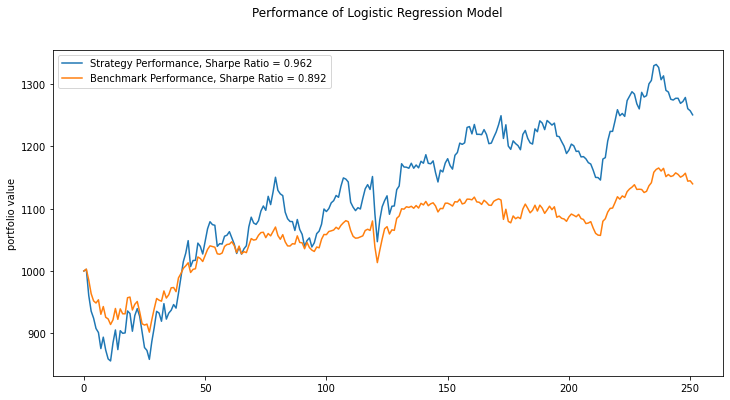

In [138]:
plt.figure(figsize = (12, 6))
plt.suptitle('Performance of Logistic Regression Model')
plt.plot(t_list, lst1, label = 'Strategy Performance, Sharpe Ratio = %.3f' % (findsp(lst1)[2]))
plt.plot(t_list, lst2, label = 'Benchmark Performance, Sharpe Ratio = %.3f' % (findsp(lst2)[2]))
plt.legend()
plt.ylabel('portfolio value')
plt.show()

In [116]:
def findsp(p_hist):
    ret_lst = []
    for i in range(1, len(p_hist)):
        #print(np.log(p_hist[i]/p_hist[i-1]))
        ret_lst.append(np.log(p_hist[i]/p_hist[i-1]))
    std_an = np.std(ret_lst) * np.sqrt(252)
    ret = np.mean(ret_lst) * 252
    return ret, std_an, ret/std_an

In [127]:
findsp(lst1)

(0.22468916192088606, 0.23833720084659418, 0.9427364302457647)

In [134]:
findsp(lst2)

(0.13154116441844757, 0.1444617029067219, 0.9105608045018199)

In [273]:
def back_test1(weight, returnhist):
    portfolio_learned = []
    portfolio_learned.append([item * 1000 for item in weight])
    for i in range(1, len(returnhist)):
        temp_port = [returnhist.iloc[i][j] * portfolio_learned[-1][j] for j in range(len(portfolio_learned[0]))]
        portfolio_learned.append(temp_port)
    return portfolio_learned
        

In [274]:
choose_layers = []
for i in range(1, 10):
    for j in range(1, 10):
        choose_layers.append((i*5, j*5))

In [278]:
learned_weight1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [282]:
resul_sp = []
N = 50
        
for item in choose_layers:
    clf = MLPClassifier(hidden_layer_sizes=item, max_iter=10000).fit(train_data[train_data.columns[1:]], train_data['Chosen'])
    kkk = clf.predict_proba(test_data[test_data.columns[1:]])
    
    cc1 = kkk.tolist()
    for i in range(len(cc1)):
        cc1[i].append(i)
    cc1.sort(key = lambda x: x[1], reverse=True)
    learned_weight1 = np.zeros(length).tolist()
    for i in range(N):
        learned_weight1[cc1[i][2]] = 1/N
    perf3 = back_test1(learned_weight1, bt_return_df)
    lst3 = []
    t_list = []
    for i in range(len(perf3)):
        t_list.append(i)
        lst3.append(np.sum(perf3[i]))
    mmm = findsp(lst3)[2]
    resul_sp.append(mmm)
    print(mmm)

1.1169480390227042
0.9336790676328166
0.9283674586174614
0.4958666050258723
0.9619895253840755
1.0215481612272912
0.932496014629497
0.9798000611353165
0.9011630526036779
1.1789858800267377
1.0441554693093744
0.7340782659492088
0.947444900844227
1.0453381858932032
1.081548341037017
0.8509762080278818
0.7627090238513358
0.412624440523165
0.9509185868112991
0.7300723573605212
0.959250473079647
0.575126418372783
0.9054393425498228
1.0367372856224137
0.8720125318790867
1.0767176529138978
1.0361212314006516
1.0348710193074633
1.0634747622049519
1.0152482181356899
0.8175561541316426
1.0736735445444268
1.1722414193103183
0.8267314388544625
0.92776599285716
1.0876960156402566
0.9299936097818877
0.6746321090762668
1.0048959727761757
0.5890191928084915
1.045592718945191
1.1166166028690223
1.132154687229524
0.8403655562896272
0.951658021187621
1.0733830212474578
0.9301812330487886
1.152484013436522
0.7768917917977013
0.6986731443597787
1.02058434182765
1.1403156206880185
0.9943501813188449
0.92888

In [298]:
X

array([[-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       ...,
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5]])

In [301]:
X = []
Y = []
for i in range(1, 10):
    X.append([j*5 for j in range(1, 10)])
    Y.append([i*5 for j in range(1, 10)])

In [313]:
Z = np.zeros((9,9)).tolist()

In [312]:
resul_sp[choose_layers.index(((0+1)*5, (0+1)*5))]

1.1169480390227042

In [317]:
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

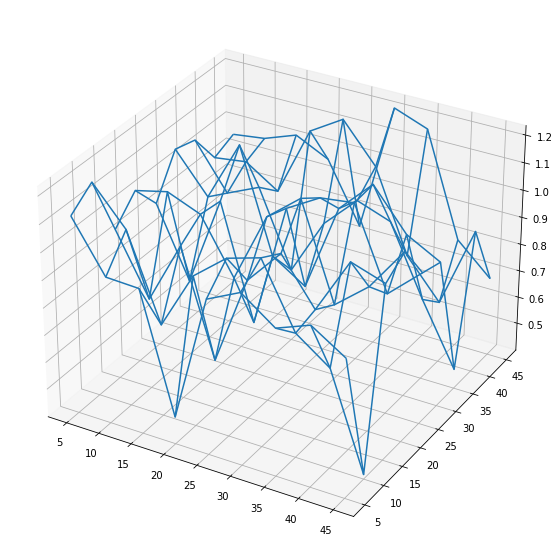

In [321]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')


# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z)

plt.show()

In [315]:
for i in range(9):
    for j in range(9):
        Z[i][j] = resul_sp[choose_layers.index(((i+1)*5, (j+1)*5))]

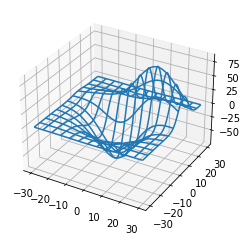

In [291]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

array([[-0.00982064, -0.0113957 , -0.01319036, ..., -0.01522953,
        -0.01319036, -0.0113957 ],
       [-0.0113957 , -0.01322338, -0.01530587, ..., -0.01767209,
        -0.01530587, -0.01322338],
       [-0.01319036, -0.01530587, -0.01771632, ..., -0.02045518,
        -0.01771632, -0.01530587],
       ...,
       [-0.01200234, -0.01414685, -0.01660867, ...,  0.02918791,
         0.03019517,  0.03085725],
       [-0.01097235, -0.01288301, -0.01507265, ...,  0.01583738,
         0.01709512,  0.01804782],
       [-0.00988645, -0.01157475, -0.01350698, ...,  0.00702321,
         0.0083816 ,  0.00947216]])

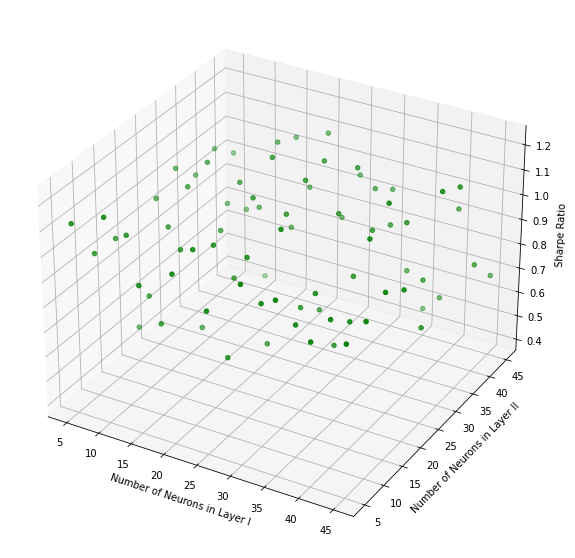

In [322]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

x =[item[0] for item in choose_layers]
y =[item[1] for item in choose_layers]
z =[resul_sp]

ax.scatter(x, y, z, c='g', marker='o')

ax.set_xlabel('Number of Neurons in Layer I')
ax.set_ylabel('Number of Neurons in Layer II')
ax.set_zlabel('Sharpe Ratio')

plt.show()

In [225]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(hidden_layer_sizes=(90, 90), max_iter=10000).fit(train_data[train_data.columns[1:]], train_data['Chosen'])
kk3 = clf2.predict_proba(test_data[test_data.columns[1:]])
kk4 = clf2.predict(test_data[test_data.columns[1:]])
kk5 = clf2.predict(train_data[train_data.columns[1:]])
kk6 = clf2.predict_proba(train_data[train_data.columns[1:]])

In [226]:
N = 50
cc1 = kk3.tolist()
for i in range(len(cc1)):
    cc1[i].append(i)
cc1.sort(key = lambda x: x[1], reverse=True)
learned_weight1 = np.zeros(length).tolist()
for i in range(N):
    learned_weight1[cc1[i][2]] = 1/N
benchmark_weight1 = []
for i in range(length):
    benchmark_weight1.append(1./length)

In [227]:
perf3, perf4 = back_test(learned_weight1, benchmark_weight1, bt_return_df)

In [228]:
lst3 = []
lst4 = []
t_list = []
for i in range(len(perf3)):
    t_list.append(i)
    lst3.append(np.sum(perf3[i]))
    lst4.append(np.sum(perf4[i]))

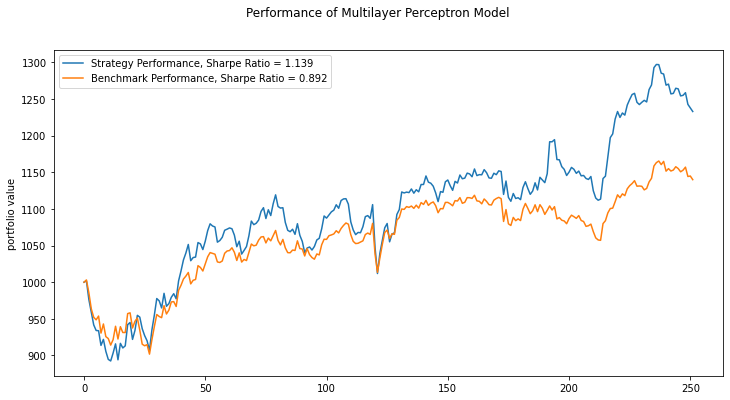

In [232]:
plt.figure(figsize = (12, 6))
plt.suptitle('Performance of Multilayer Perceptron Model')
plt.plot(t_list, lst3, label = 'Strategy Performance, Sharpe Ratio = %.3f' % (findsp(lst3)[2]))
plt.plot(t_list, lst4, label = 'Benchmark Performance, Sharpe Ratio = %.3f' % (findsp(lst4)[2]))
plt.legend()
plt.ylabel('portfolio value')
plt.show()

In [99]:
t1 = np.array(lst1)

In [100]:
t1

array([1000.        , 1008.33912153,  919.8209034 ,  876.60121686,
        869.30006038,  800.88468314,  773.02156707,  739.01368131,
        771.82266541,  737.98733659,  695.05650539,  703.31723394,
        780.2510426 ,  783.37870777,  718.46829647,  761.14612159,
        781.74963586,  779.8735193 ,  826.65422973,  801.03535105,
        753.1402926 ,  818.60825025,  838.88461514,  822.52280776,
        759.76873862,  712.47320608,  694.73270724,  677.64050618,
        715.69866836,  729.61397358,  773.25338682,  755.05954413,
        706.8018514 ,  764.81039569,  711.10633407,  738.23839797,
        732.55730527,  750.71119216,  740.21924866,  744.23529085,
        841.92622602,  916.07655322,  995.6884302 , 1036.56170424,
        904.53003621,  934.24032404,  945.63430864,  987.18540945,
        974.16328115,  944.10875269,  999.24004763, 1038.48866762,
       1043.74143066, 1047.9748716 , 1053.8033655 ,  951.25322659,
        966.44141808,  960.75462803,  974.12280817,  972.45684

In [ ]:
portfolio = []
for item in learned
for i in range(1, len(temp_return_df)):
    

In [47]:
kk2 = kk2.tolist()

In [52]:
kk2.index(1)

71

In [57]:
kk[71]

array([-2.31529213, -0.10395854])

In [235]:
cc

[[-2.488195518308021, -0.08671292461131995, 345],
 [-2.315292128743751, -0.10395853863679715, 71],
 [-2.183494407326179, -0.11951263826643378, 146],
 [-1.0852588044825673, -0.4122093193304601, 264],
 [-1.0712296642015264, -0.419442829911435, 120],
 [-1.047376686230242, -0.432102171738408, 263],
 [-1.0316372943736178, -0.44071346633166364, 259],
 [-0.6635036692600995, -0.7236963446943447, 80],
 [-0.6588253908842692, -0.7286889514294405, 32],
 [-0.640084135130623, -0.7491844722289166, 235],
 [-0.6335728382807447, -0.7564967168752437, 320],
 [-0.6259411936898428, -0.7651973225504121, 280],
 [-0.6133400131777818, -0.7798802632587355, 373],
 [-0.5865413815685688, -0.8124890042714009, 190],
 [-0.5812295349528287, -0.8191875581608807, 397],
 [-0.5764544133620468, -0.8252785438279594, 209],
 [-0.5664231628171756, -0.8382928512038184, 167],
 [-0.5644141213505633, -0.8409356889168415, 391],
 [-0.5609216090543013, -0.8455594138208471, 219],
 [-0.5486117284803825, -0.8621608721562889, 351],
 [-0.5

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_data[train_data.columns[1:]], train_data['Optimal Weight'])

In [ ]:
predicted_weights = reg.predict(test_data[test_data.columns[1:]])
predicted_weights /= np.sum(predicted_weights)

In [ ]:
port_returns = []
port_variance = []
for i in range(100000):
    weights = np.random.random(len(New_Name_list))
    weights /= np.sum(weights)
    port_returns.append(np.sum(mean_ret * weights))
    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(cov_df, weights))))

In [ ]:
temp_price_df = price_df.iloc[int(max_dates * 6 / 7): int(max_dates * (6+1) / 7)]
temp_return_df = np.log(temp_price_df / temp_price_df.shift(1))
temp_cov_df = temp_return_df.cov() * 252
temp_mean_ret = temp_return_df.mean() * 252

p_return = np.sum(temp_mean_ret * predicted_weights)
p_vol = np.sqrt(np.dot(predicted_weights.T, np.dot(temp_cov_df, predicted_weights)))

In [ ]:
p_return

In [ ]:
p_vol

In [ ]:
p_return / p_vol

In [ ]:
e_weight = np.ones(length) / length
e_return = np.sum(temp_mean_ret * e_weight)
e_vol = np.sqrt(np.dot(e_weight.T, np.dot(temp_cov_df, e_weight)))

In [ ]:
e_return

In [ ]:
e_vol

In [ ]:
e_return / e_vol

In [237]:
bt_price_df

,AAL,AAP,AAPL,ABC,ABT,ADBE,ADI,ADM,ADS,ADSK,...,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZBH,ZION,AIV
1510,857.651992,377.018329,344.586698,382.538516,164.294641,247.964414,171.897692,113.886244,412.369093,234.943518,...,204.113253,180.457056,112.017349,166.600616,119.351101,183.625731,205.785121,169.626788,200.375086,248.433596
1511,849.475891,374.442777,335.951591,388.133702,164.256363,248.961974,170.634673,115.157303,415.920462,235.255158,...,204.540615,183.136335,112.971802,169.997163,119.119351,188.304099,205.272157,173.158947,198.199550,254.761905
1512,864.360587,364.536883,329.377125,382.200536,162.878642,245.403066,163.372283,112.360985,410.047044,231.943907,...,202.777783,179.787245,112.031813,167.534661,117.612978,188.070175,203.818755,173.908692,192.423106,251.879706
1513,848.008407,368.573547,315.475905,369.996255,158.975066,240.253440,159.204288,109.691773,397.677953,218.075575,...,198.557692,172.695050,110.238613,166.062821,114.368482,176.374269,196.865201,169.910035,186.646654,250.438603
1514,846.331216,360.475469,317.144058,367.855812,155.645533,236.856290,157.814967,109.278678,390.059211,214.491628,...,194.711554,169.148943,108.011569,161.307667,111.123986,179.122801,194.186372,169.193607,184.546137,245.676685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,1016.352201,423.204544,381.122371,295.005636,147.034703,283.149089,233.154392,143.469982,354.590989,296.065446,...,202.938056,238.613095,131.178592,167.676192,103.707995,226.081871,252.948729,170.476508,329.032266,280.325827
1758,1019.077589,425.557186,383.542835,295.981986,147.723569,283.041259,234.638453,145.058797,354.697239,295.987546,...,203.151715,241.292374,131.236439,167.195009,103.592121,227.602327,253.820821,171.842717,329.557389,277.631585
1759,999.371027,422.040599,381.907398,294.217052,146.269307,279.778908,232.270281,144.073726,346.896358,292.247748,...,201.388905,238.888902,130.585684,164.590995,101.506373,226.491228,252.591960,171.709427,324.681163,277.130326
1760,990.566038,421.693895,381.809275,297.934656,146.613740,279.536263,232.333445,144.137281,347.928371,292.091948,...,199.038461,239.322318,130.657983,164.874035,101.042874,225.964906,252.235192,172.442519,321.005259,280.075194


In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.api import OLS


In [238]:
sector_pivot = bt_price_df.reset_index()
plt.figure(figsize = (10,10))
sns.heatmap(sector_pivot.corr(),annot=True, cmap="coolwarm")

<AxesSubplot:>

Error in callback <function flush_figures at 0x0000024213F84E50> (for post_execute):


KeyboardInterrupt: 